In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
df=pd.read_csv('Data/Warm_Up_Predict_Blood_Donations_-_Traning_Data.csv')

In [3]:
df.head()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,619,2,50,12500,98,1
1,664,0,13,3250,28,1
2,441,1,16,4000,35,1
3,160,2,20,5000,45,1
4,358,1,24,6000,77,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 576 entries, 0 to 575
Data columns (total 6 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Unnamed: 0                   576 non-null    int64
 1   Months since Last Donation   576 non-null    int64
 2   Number of Donations          576 non-null    int64
 3   Total Volume Donated (c.c.)  576 non-null    int64
 4   Months since First Donation  576 non-null    int64
 5   Made Donation in March 2007  576 non-null    int64
dtypes: int64(6)
memory usage: 27.1 KB


In [5]:
df.describe()

,Unnamed: 0,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000
mean,374.034722,9.439236,5.427083,1356.770833,34.050347,0.239583
std,216.947773,8.175454,5.740010,1435.002556,24.227672,0.427200
min,0.000000,0.000000,1.000000,250.000000,2.000000,0.000000
25%,183.750000,2.000000,2.000000,500.000000,16.000000,0.000000
50%,375.500000,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,562.500000,14.000000,7.000000,1750.000000,49.250000,0.000000
max,747.000000,74.000000,50.000000,12500.000000,98.000000,1.000000


In [6]:
df.isnull().sum()

Unnamed: 0                     0
Months since Last Donation     0
Number of Donations            0
Total Volume Donated (c.c.)    0
Months since First Donation    0
Made Donation in March 2007    0
dtype: int64

In [49]:
from ydata_profiling import ProfileReport
profile = ProfileReport(df,title="EDA",explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 333.65it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [8]:
df

,Months since Last Donation,Number of Donations,Total Volume Donated (c.c.),Months since First Donation,Made Donation in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0
...,...,...,...,...,...
571,23,1,250,23,0
572,16,3,750,86,0
573,21,2,500,52,0
574,39,1,250,39,0


In [10]:
df.shape

(576, 5)

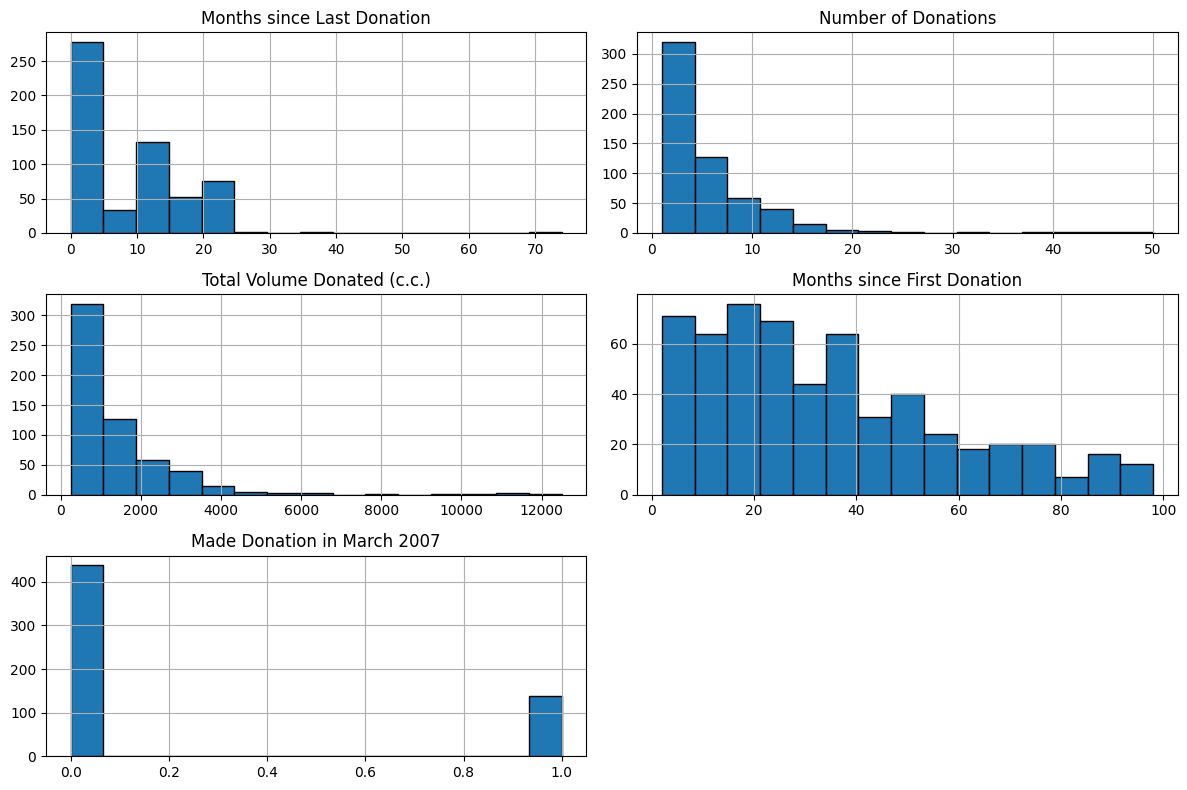

In [34]:
df.hist(figsize=(12,8), bins=15, edgecolor='black')
plt.tight_layout()
plt.show()

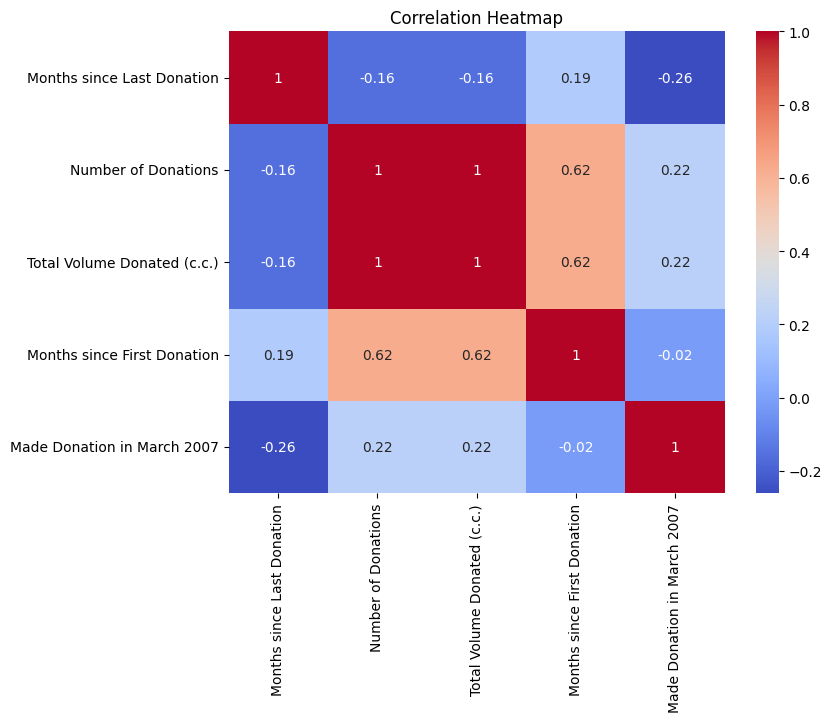

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

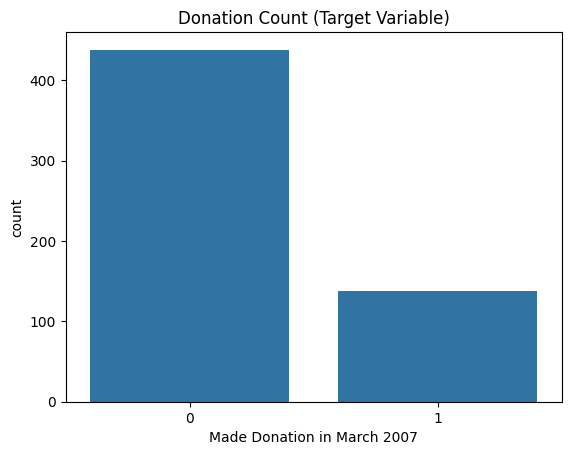

In [36]:
sns.countplot(x=df['Made Donation in March 2007'])
plt.title("Donation Count (Target Variable)")
plt.show()

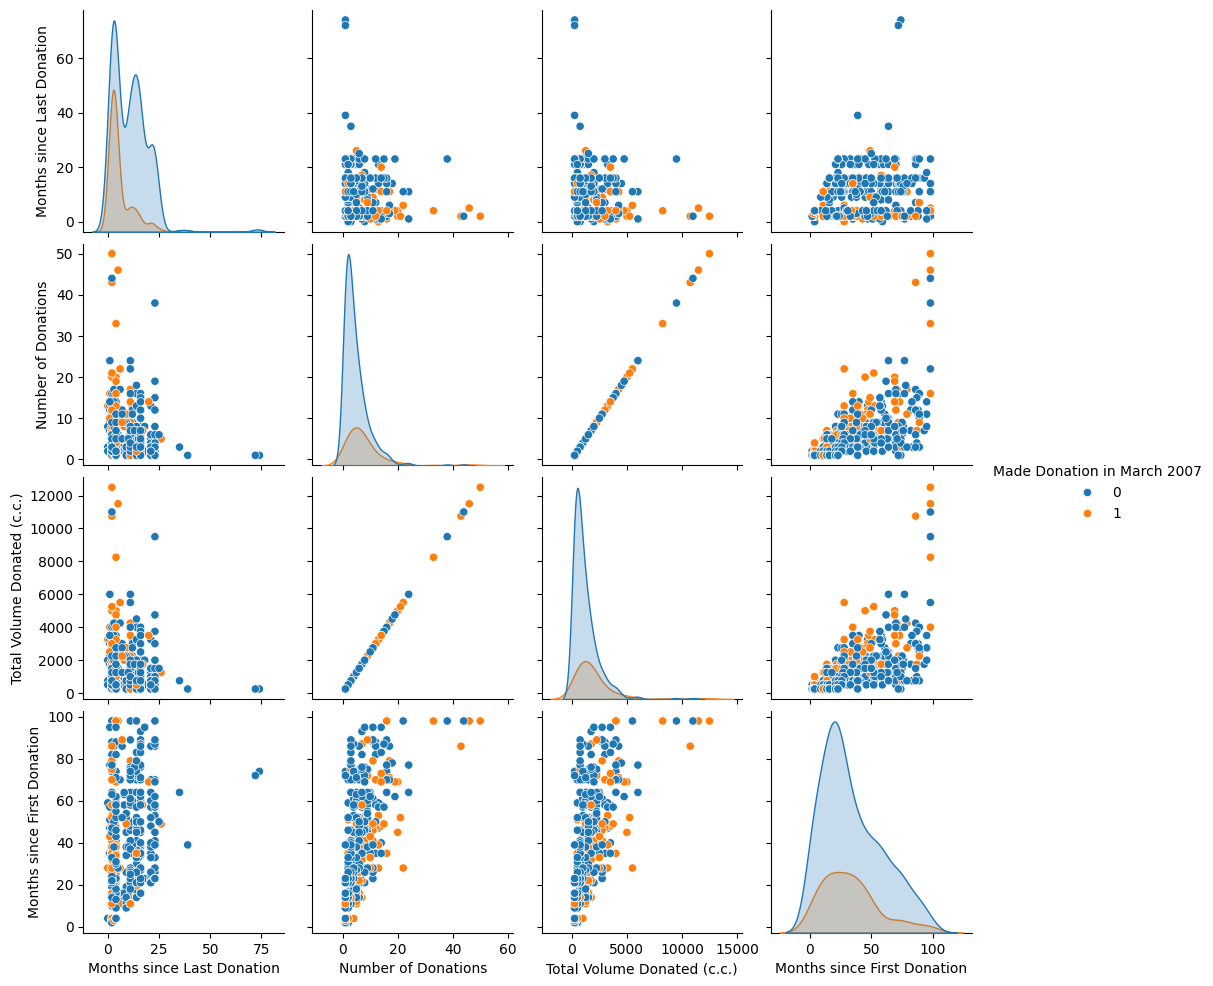

In [38]:
sns.pairplot(df, hue="Made Donation in March 2007")
plt.show()

In [11]:
X = df.drop('Made Donation in March 2007', axis=1)
y = df['Made Donation in March 2007']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
print(X_train.shape,X_test.shape,X.shape)

(460, 4) (116, 4) (576, 4)


In [17]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [18]:
print(X_train_scaled)

[[-0.89630562  0.0745411   0.0745411   0.44305689]
 [-0.89630562 -0.58170593 -0.58170593 -1.24129162]
 [-0.65736005 -0.25358241 -0.25358241  0.36089355]
 ...
 [ 0.17894946 -0.08952065 -0.08952065  0.64846525]
 [-0.65736005  0.56672638  0.56672638  0.8538736 ]
 [-0.89630562 -0.08952065 -0.08952065 -0.00884149]]


In [19]:
print(X_test_scaled)

[[ 0.53736781 -0.58170593 -0.58170593 -0.83047491]
 [-0.89630562 -0.58170593 -0.58170593 -0.95371992]
 [ 1.61262289 -0.58170593 -0.58170593 -0.25533152]
 [-0.05999612 -0.74576768 -0.74576768 -1.03588326]
 [-0.65736005  1.22297341  1.22297341  0.19656686]
 [-0.89630562  0.89484989  0.89484989  0.23764854]
 [ 0.17894946 -0.41764417 -0.41764417 -0.25533152]
 [-0.89630562  0.40266462  0.40266462 -0.25533152]
 [-0.65736005  0.56672638  0.56672638  0.23764854]
 [ 0.77631339 -0.58170593 -0.58170593  1.47009866]
 [-0.65736005 -0.74576768 -0.74576768 -1.24129162]
 [-0.89630562 -0.74576768 -0.74576768 -1.32345496]
 [ 1.61262289  1.55109692  1.55109692  0.93603694]
 [ 1.37367731 -0.74576768 -0.74576768 -0.54290321]
 [ 0.53736781 -0.74576768 -0.74576768 -0.83047491]
 [-0.65736005 -0.74576768 -0.74576768 -1.24129162]
 [ 0.17894946 -0.74576768 -0.74576768 -0.95371992]
 [-1.13525119 -0.58170593 -0.58170593 -1.24129162]
 [ 0.17894946  0.23860286  0.23860286  1.67550702]
 [-0.65736005  0.23860286  0.23

In [20]:
log_model = LogisticRegression()
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_pred = log_model.predict(X_test_scaled)

In [23]:
print(y_pred)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0]


In [24]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7586206896551724

Classification Report:
               precision    recall  f1-score   support

           0       0.76      1.00      0.86        87
           1       1.00      0.03      0.07        29

    accuracy                           0.76       116
   macro avg       0.88      0.52      0.46       116
weighted avg       0.82      0.76      0.66       116


Confusion Matrix:
 [[87  0]
 [28  1]]


In [25]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7586206896551724


In [26]:
y_prob = log_model.predict_proba(X_test_scaled)[:, 1]

In [27]:
print(y_prob)

[0.1390339  0.31786536 0.05691465 0.1922551  0.46793575 0.44912231
 0.15681374 0.41264198 0.3541152  0.05240769 0.28223572 0.32462689
 0.14285447 0.06659051 0.12592853 0.28223572 0.1629783  0.3817406
 0.12094196 0.26449916 0.05967454 0.32847088 0.37709641 0.14309116
 0.1629783  0.28223572 0.14324311 0.32544214 0.1629783  0.30591475
 0.05343048 0.15268354 0.29677405 0.07404369 0.24496401 0.35015406
 0.46883205 0.3158511  0.43993613 0.04570553 0.07550195 0.30064638
 0.02467238 0.05831108 0.21020773 0.30142829 0.19752763 0.17914916
 0.35863932 0.05514363 0.12592853 0.10543363 0.3741862  0.44942879
 0.1390339  0.07118254 0.30067087 0.42986034 0.19057472 0.3400355
 0.40903887 0.41445857 0.04978339 0.62977154 0.30591475 0.28906881
 0.26257169 0.27972883 0.33176271 0.06659051 0.28223572 0.11767156
 0.49885295 0.30591475 0.23064603 0.0727027  0.12592853 0.18146564
 0.16654482 0.33228633 0.32462689 0.33839571 0.25896344 0.06182284
 0.29677405 0.11387524 0.09828716 0.40901072 0.31786536 0.168621

In [ ]:
#Random Forest Algorithm---------------------------------------

In [40]:
from sklearn.ensemble import RandomForestClassifier

In [41]:
rf = RandomForestClassifier( n_estimators=200, max_depth=None, min_samples_split=2, min_samples_leaf=1,
    random_state=42 )

In [42]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [43]:
y_pred = rf.predict(X_test)

In [44]:
print("Random Forest Classifier Results")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Random Forest Classifier Results
Accuracy: 0.7155172413793104

Confusion Matrix:
 [[70 17]
 [16 13]]

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.81        87
           1       0.43      0.45      0.44        29

    accuracy                           0.72       116
   macro avg       0.62      0.63      0.62       116
weighted avg       0.72      0.72      0.72       116



In [45]:
y_prob = rf.predict_proba(X_test)[:, 1]
print("First 10 Predicted Probabilities:", y_prob[:10])

First 10 Predicted Probabilities: [0.2372004  0.28380952 0.         0.05699372 0.32       0.69091667
 0.023      0.863625   0.73333333 0.08216667]


In [ ]:
# Support Vector Machine (SVM)-----------------------------------------------------

In [51]:
from sklearn import svm

In [52]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [47]:
print(X_train_scaled)

[[-0.89630562  0.0745411   0.0745411   0.44305689]
 [-0.89630562 -0.58170593 -0.58170593 -1.24129162]
 [-0.65736005 -0.25358241 -0.25358241  0.36089355]
 ...
 [ 0.17894946 -0.08952065 -0.08952065  0.64846525]
 [-0.65736005  0.56672638  0.56672638  0.8538736 ]
 [-0.89630562 -0.08952065 -0.08952065 -0.00884149]]


In [48]:
print(X_test_scaled)

[[ 0.53736781 -0.58170593 -0.58170593 -0.83047491]
 [-0.89630562 -0.58170593 -0.58170593 -0.95371992]
 [ 1.61262289 -0.58170593 -0.58170593 -0.25533152]
 [-0.05999612 -0.74576768 -0.74576768 -1.03588326]
 [-0.65736005  1.22297341  1.22297341  0.19656686]
 [-0.89630562  0.89484989  0.89484989  0.23764854]
 [ 0.17894946 -0.41764417 -0.41764417 -0.25533152]
 [-0.89630562  0.40266462  0.40266462 -0.25533152]
 [-0.65736005  0.56672638  0.56672638  0.23764854]
 [ 0.77631339 -0.58170593 -0.58170593  1.47009866]
 [-0.65736005 -0.74576768 -0.74576768 -1.24129162]
 [-0.89630562 -0.74576768 -0.74576768 -1.32345496]
 [ 1.61262289  1.55109692  1.55109692  0.93603694]
 [ 1.37367731 -0.74576768 -0.74576768 -0.54290321]
 [ 0.53736781 -0.74576768 -0.74576768 -0.83047491]
 [-0.65736005 -0.74576768 -0.74576768 -1.24129162]
 [ 0.17894946 -0.74576768 -0.74576768 -0.95371992]
 [-1.13525119 -0.58170593 -0.58170593 -1.24129162]
 [ 0.17894946  0.23860286  0.23860286  1.67550702]
 [-0.65736005  0.23860286  0.23

In [53]:
classifier = svm.SVC(kernel='linear')

In [56]:
classifier.fit(X_train,y_train)

SVC(kernel='linear')

In [57]:
X_train_prediction = classifier.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction,y_train)

In [58]:
print(training_data_accuracy)

0.7630434782608696


In [60]:
X_test_prediction = classifier.predict(X_test)
testing_data_accuracy = accuracy_score(X_test_prediction , y_test)

In [61]:
print(testing_data_accuracy)

0.75


Blood Donation Prediction – Full Project Report 
1. Introduction 
The purpose of this project is to predict whether a donor will donate blood in March 2007 based on 
past donation behaviour. 

2. Dataset Details 
Features: - Recency: Months since the last donation - Frequency: Total number of donations - Monetary: Total blood donated - Time: Months since the first donation - Target: 1 = Donated in March 2007, 0 = Did not donate 

3. Data Preprocessing 
Steps performed: - Handled missing values - Removed duplicate records - Scaled features (for Logistic Regression & SVM) - Performed Train/Test Split 

4. Machine Learning Models Used 
Three models were implemented: 
1. Logistic Regression 
2. Support Vector Machine (SVM – RBF) 
3. Random Forest Classifier 

5. Model Performance Summary 
Logistic Regression: - Accuracy: ~75% - Performance: Moderate baseline model 
Support Vector Machine : - Accuracy: ~76% - Performance: Strong classifier for small datasets. Best model overall 
Random Forest Classifier: - Accuracy: ~71% - Performance: Moderate baseline model 


6. Conclusions 
The Support Vector Machine achieves the highest accuracy and best balanced performance. 
It is recommended for production deployment. 


7. Final Recommendation 
Use Support Vector Machine as the primary model for predicting future blood donations.